In [ ]:
# Thermodynamically consistent neural network plasticity modeling and discovery of evolution laws 
# Knut Andreas Meyer ∗, Fredrik Ekre
# 2.3. Network architecture and scaling

# 2. Model formulation

material models calculate the stress, $\sigma$, for a given time history of strains, $\epsilon$. In addition to fitting experimental data, it is widely accepted that material models respect the following physical constraints:

- A convex Helmholtz' free energy for Thermodynamic stability (Maugin (1992), Lemaitre and Chaboche (1990) and Lubarda (2008)) 
- A non-negative dissipation.
- Frame invariance.

The Helmholtz's free energy, $\Psi$:

$$
\Psi\left(\epsilon, \epsilon_{\mathrm{p}}, b, k\right):=\Psi_{\mathrm{e}}+\Psi_{\mathrm{p}}, \quad \Psi_{\mathrm{e}}:=\frac{1}{2}\left[\boldsymbol{\epsilon}-\epsilon_{\mathrm{p}}\right]: \mathrm{E}:\left[\boldsymbol{\epsilon}-\epsilon_{\mathrm{p}}\right], \quad \Psi_{\mathrm{p}}:=\frac{1}{3} H_{\mathrm{kin}} \boldsymbol{b}: \boldsymbol{b}+\frac{1}{2}\left|H_{\text {iso }}\right| k^2
$$

- $\epsilon$   total strains
- $\epsilon_{\mathrm{p}}$  plastic strains
- $E$  elastic stiffness tensor, 
- $H_{\text {kin }}$ kinematic hardening moduli
- $H_{\text {iso }}$ isotropic hardening moduli
- $b$ internal variables for kinematic hardening.
- $k$ internal variables forisotropic hardening. 


For the above Helmholtz' free energy, it is sufficient that $\mathbf{E}$ is positive definite and that $\boldsymbol{H}_{\mathrm{kin}}$ is positive to obtain a convex function. The absolute value of $H_{\text {iso }}$ enables isotropic softening while maintaining the convexity.

In this work, the isotropic von Mises effective stress is used to define the yield criterion as

$$
\Phi:=f_{\mathrm{vM}}(\sigma-\beta)-\left[Y_0+\kappa\right], \quad f_{\mathrm{vM}}(x):=\sqrt{\frac{3}{2} x: x^{\mathrm{dev}}}
$$

- $Y_0$ initial yield limit. 
- ${\bullet}^{\text {dev}}$ is the deviatoric part of the tensor $\bullet$,
- $\boldsymbol{\beta}$ is the back-stress conjugated to $\boldsymbol{b}$,
- $\kappa$ is the isotropic hardening stress conjugated to $k$.

The stresses:

$$
\begin{aligned}
\sigma & :=\frac{\partial \Psi}{\partial \epsilon}=\mathrm{E}:\left[\epsilon-\epsilon_{\mathrm{p}}\right] \\
\beta & :=-\frac{\partial \Psi}{\partial b}=-\frac{2}{3} H_{\mathrm{kin}} b \\
\kappa & :=-\frac{\partial \Psi}{\partial k}=-\left|H_{\mathrm{iso}}\right| k
\end{aligned}
$$


Dissipation:
$$
\mathcal{D}=\sigma: \dot{\epsilon}-\dot{\Psi}=\sigma: \dot{\epsilon}_{\mathrm{p}}+\beta: \dot{b}+\kappa \dot{k}
$$

Clausius-Duhem dissipation inequality requires that $\mathcal{D} \geq 0$. 

Associative evolution laws maximize $\mathcal{D}$, and is typically employed for the plastic strains.

For $\dot{b}$ and $\dot{k}$, this leads to linear hardening laws that do not accurately capture experimentally observed material behaviors, motivating the use of non-associative evolution laws. 

As an example, the evolution laws for ArmstrongFrederick kinematic hardening (Frederick and Armstrong, 2007) and Voce isotropic hardening, together with the associative evolution of plastic strains, are given by

$$
\begin{aligned}
\dot{\epsilon}_{\mathrm{p}} & =\dot{\lambda} v \\
\dot{b} & =-\dot{\lambda} g_{\mathrm{kin}}(\cdot)=-\dot{\lambda}\left[v-\frac{3}{2} \frac{\beta}{\beta_{\infty}}\right] \\
\dot{k} & =-\dot{\lambda} g_{\text {iso }}(\cdot)=-\dot{\lambda}\left[1-\frac{\kappa}{\kappa_{\infty}}\right]
\end{aligned}
$$

where

$$
v:=\frac{\partial \Phi}{\partial \sigma}=\frac{3}{2} \frac{\sigma^{\mathrm{dev}}-\beta^{\mathrm{dev}}}{f_{\mathrm{vM}}(\sigma-\boldsymbol{\beta})}
$$


$g_{\text {kin }}(\cdot)$ and $g_{\text {iso }}(\cdot)$: arbitrary evolution laws 
right hand side shows the specific Armstrong-Frederick and Voce hardening laws.

The plastic multiplier, $\dot{\lambda}$, is given by the KKT loading/unloading conditions,

$$
\Phi \leq 0, \quad \dot{\lambda} \geq 0, \quad \Phi \dot{\lambda}=0
$$

for rate independent behavior. 

For viscoplastic behavior, $\dot{\lambda}$ is defined by an overstress function, $\eta$,

$$
\dot{\lambda}=\frac{1}{t^*} \eta(\sigma, \beta, \kappa)
$$

where $\eta \geq 0$ is unitless and $t^*>0$ is a characteristic time. In this work, we adopt the Norton overstress function,

$$
\eta=\left[\frac{\langle\Phi\rangle}{Y_0}\right]^n
$$


- $n$ : material parameter 
- $\langle\cdot\rangle:=\max (\cdot, 0)$ : Macaulay bracket. 

the dissipation inequality is fulfilled if $\beta_{\infty}>0$ and $\kappa_{\infty}>0$. 

$$
\mathcal{D}=\dot{\lambda}\left[\Phi+Y_0+\frac{3}{2} \frac{\beta: \boldsymbol{\beta}}{\beta_{\infty}}+\frac{\kappa^2}{\kappa_{\infty}}\right] \geq 0
$$

We will denote this complete model, with the Norton overstress function, as the "Chaboche"-model. 

this model cannot accurately describe the behavior of many materials. A critical modeling choice is the form and parameterization of the two hardening evolution laws Especially for kinematic hardening, many different equations have been proposed; see Table 1 in Xiao et al. (2012) for an overview.

As these functions are unknown, a universal function approximator, such as a neural network, is suitable to model these. However, such a material model must fulfill the previously mentioned criteria.

Convexity is already assured by not modifying the free energy.

To fulfill the dissipation inequality, we propose the following novel evolution equations

$$
\begin{aligned}
\dot{b} & =-\dot{\lambda}\left[\left[1-[v: \beta] \mathrm{NN}_{\mathrm{k}, v}\right] v-\mathrm{NN}_{\mathrm{k}, \boldsymbol{\beta}} \boldsymbol{\beta}\right] \\
\dot{k} & =-\dot{\lambda}\left[1-\kappa \mathrm{NN}_{\mathrm{iso}}\right]
\end{aligned}
$$

$\mathrm{NN}_{\mathrm{k}, v}, \mathrm{NN}_{\mathrm{k}, \beta}$, and $\mathrm{NN}_{\text {iso }}$ are scalar outputs from a neural network.

The scalar factors, $v: \beta$ and $\kappa$, in front of $\mathrm{NN}_{\mathrm{k}, v}$ and $\mathrm{NN}_{\mathrm{iso}}$, makes it possible to inherently fulfill the Clausius-Duhem dissipation inequality, $\mathcal{D} \geq 0$,

$$
\mathcal{D}=\dot{\lambda}\left[\boldsymbol{\phi}+Y_0+[v: \boldsymbol{\beta}]^2 \mathrm{NN}_{\mathrm{k}, v}+[\boldsymbol{\beta}: \boldsymbol{\beta}] \mathrm{NN}_{\mathrm{k}, \boldsymbol{\beta}}+\kappa^2 \mathrm{NN}_{\text {iso }}\right]
$$

by requiring positive neural network outputs. A non-negative activation function in the last layer fulfills this requirement; see Section 2.3. 

Furthermore, those scalar factors cause $H_{\text {kin }}$ and $H_{\text {iso }}$ to retain their physical interpretation wrt. the initial plastic stiffness. 

We note that a straightforward choice of evolution law, e.g. $\dot{k}=-\dot{\lambda} N N_{\text {iso }}$, requires more complicated restrictions on the neural network to ensure a positive dissipation.

Finally, we require a frame invariant model formulation, implying that the model response is independent of the chosen coordinate system.

In particular, tensor components are neither inputs nor outputs of the neural network; inputs are independent invariants of the current material state, and outputs are the scalar factors. 

In the most general case for the proposed model, we can then use the following 19 invariant inputs (see e.g. Boehler, 1977)

$$
\begin{array}{cccc}
\kappa & \operatorname{tr}\left(\epsilon_{\mathrm{p}}^2\right) & \operatorname{tr}\left(\boldsymbol{\beta}^2\right) & \\
\operatorname{tr}(\boldsymbol{v} \boldsymbol{\beta}) & \operatorname{tr}\left(\boldsymbol{v} \epsilon_{\mathrm{p}}\right) & \operatorname{tr}\left(\boldsymbol{\beta} \epsilon_{\mathrm{p}}\right) & \operatorname{tr}\left(\boldsymbol{\beta}^2 \epsilon_{\mathrm{p}}^2\right) \\
\operatorname{tr}\left(\boldsymbol{v}^3\right) & \operatorname{tr}\left(\epsilon_{\mathrm{p}}^3\right) & \operatorname{tr}\left(\boldsymbol{\beta}^3\right) & \operatorname{tr}\left(\boldsymbol{\beta}^2 \epsilon_{\mathrm{p}}\right) \\
\operatorname{tr}\left(\boldsymbol{v} \boldsymbol{\beta}^2\right) & \operatorname{tr}\left(\boldsymbol{v} \epsilon_{\mathrm{p}}^2\right) & \operatorname{tr}\left(\boldsymbol{v} \boldsymbol{\beta} \epsilon_{\mathrm{p}}\right) & \operatorname{tr}\left(\boldsymbol{\beta} \epsilon_{\mathrm{p}}^2\right) \\
\operatorname{tr}\left(\boldsymbol{v}^2 \epsilon_{\mathrm{p}}\right) & \operatorname{tr}\left(\boldsymbol{v}^2 \boldsymbol{\beta}\right) & \operatorname{tr}\left(\boldsymbol{v}^2 \boldsymbol{\beta}^2\right) & \operatorname{tr}\left(\boldsymbol{v}^2 \epsilon_{\mathrm{p}}^2\right)
\end{array}
$$

- $\operatorname{tr}\left(\nu^2\right)=3 / 2$ is not used as it is constant.
- von Mises yield criterion implies that $\operatorname{tr}(v)=\operatorname{tr}\left(\epsilon_{\mathrm{p}}\right)=\operatorname{tr}(\beta)=0$ and that these tensors are symmetric.
- The choice of using $v$ instead of, e.g., $\sigma^{\mathrm{dev}}$, is motivated by the dependence between $\kappa$, other invariants, and the effective stress for rate-independent loading. 

The final model uses a reduced set of the above invariants, as discussed in Section 2.3 .

the presented model is initially isotropic, structure tensors, cf. e.g. Holzapfel and Ogden (2010), can extend the model to anisotropic responses.

For example, a constant anisotropic elastic stiffness, E, would add to the invariants by considering, e.g., $\beta: E: \beta$. 

However, in the case of isotropy, this reduces to $2 G \operatorname{tr}\left(\beta^2\right)$ (where $G$ is the elastic shear modulus) and does not add an independent invariant. 

Similarly, an evolving 4th order anisotropy tensor, $\mathbf{C}$, can be used in the yield criterion (cf. Meyer and Menzel, 2021). This tensor would be another state variable giving rise to additional invariants, such as $\boldsymbol{\beta}: \mathrm{C}: \boldsymbol{\beta}$.


## 2.1. Isotropic softening

many metallic materials, such as e.g. carbon steel, may exhibit initial isotropic softening.

$H_{\text {iso }}<0$, results in isotropic softening, neglecting the absolute value in helmholz energy function. without the absolute value, the Helmholtz free energy becomes concave for a negative hardening modulus. Therefore, for $H_{\text {iso }}<0$, we use the following evolution law instead:

$$
\dot{k}=\dot{\lambda}\left[1+\kappa \mathrm{NN}_{\text {iso }}+\frac{\kappa}{Y_0}\right]
$$


In this case, $\kappa \leq 0$, and the evolution of $k$ has the opposite sign. 

The additional term, $\kappa / Y_0$ ensures that the dissipation,

$$
\mathcal{D}=\dot{\lambda}\left[\boldsymbol{\Phi}+\left[\sqrt{Y_0}+\frac{\kappa}{\sqrt{Y_0}}\right]^2+\mathrm{NN}_{\mathrm{k}, v}[v: \boldsymbol{\beta}]^2+\mathrm{NN}_{\mathrm{k}, \boldsymbol{\beta}} \boldsymbol{\beta}: \boldsymbol{\beta}+\kappa^2 \mathrm{NN}_{\mathrm{iso}}\right]
$$

is non-negative for non-negative outputs from the neural network. For a zero-valued network, this corresponds to a isotropic saturation stress of $-Y_0$.

## 2.2. Convergence requirements

The neural networks are chosen for their ability to approximate any function. However, during training, this implies that the predicted material response can become non-convergent. In practice, we have found it necessary to 

(i) avoid a zero-sized yield surface and 
(ii) avoid too rapid softening. Both these lead to lack of solutions to the local plasticity residual equations. 

The constraints described below aid convergence during training but should typically not affect the response of trained models.

### 2.2.1. Minimum yield strength

An isotropic yield limit $Y_0+\kappa<0$ yields $\Phi>0$. This result contradicts the KKT conditions and prevents solutions to the local plasticity problem. To ensure a positive yield limit, we constrain the isotropic hardening stress, $\kappa$, via the smooth bounds function $h$ defined as

$$
h(x, a, b):=\left\{\begin{array}{cc}
x & \frac{x-b}{a-b} \geq 1 \\
{[a-b] \exp \left(\frac{x-a}{a-b}\right)+b} & \frac{x-b}{a-b}<1
\end{array}\right.
$$


For $a>b, h$ provides a smooth lower bound of $x$ such that

$$
h(x, a, b)=\left\{\begin{array}{cc}
x & x \geq a \\
b & x \rightarrow-\infty
\end{array}\right.
$$

where we note that $\mathrm{d} h / \mathrm{d} x \rightarrow 1$ as $x \rightarrow a$. Specifically, we constrain $\kappa$ as

$$
\hat{\kappa}=h\left(\kappa+Y_0, Y_{\text {low }}, Y_{\min }\right)-Y_0
$$

and use $\hat{\kappa}$ in the yield criterion such that $Y_0+\hat{\kappa} \geq Y_{\text {min }}$. In all cases, $Y_{\text {low }}=2 Y_{\min }=40 \mathrm{MPa}$.

### 2.2.2. Maximum softening

compared to Meyer (2020), we analyze the existence of a solution for a rate-independent material.  we consider a loading with $\dot{\boldsymbol{\epsilon}}=\dot{\boldsymbol{\epsilon}} \boldsymbol{n}$, where $\dot{\boldsymbol{\epsilon}}>0$ and $\boldsymbol{n}$ is a 2nd order, normalized tensor, describing the loading direction. The KKT conditions implies that $\dot{\Phi}=0$ during plastic loading, resulting in

$$
\begin{aligned}
\dot{\boldsymbol{\sigma}}^{\mathrm{dev}} & =2 G \dot{\epsilon} \boldsymbol{n}^{\mathrm{dev}}-2 G \dot{\boldsymbol{\lambda}} v \\
\dot{\boldsymbol{\Phi}} & =0=2 G \dot{\epsilon} v: \boldsymbol{n}^{\mathrm{dev}}-\dot{\lambda}\left[3 G+\frac{2}{3} H_{\mathrm{kin}} v: g_{\mathrm{kin}}(\cdot)+\left|H_{\mathrm{iso}}\right| g_{\text {iso }}(\cdot)\right]
\end{aligned}
$$

where we have isotropic elasticity with shear modulus $G$, and $g_{\text {kin }}(\cdot)$ and $g_{\text {iso }}(\cdot)$ 

During plastic loading, $v: \boldsymbol{n}^{\mathrm{dev}}>0$, implying that

$$
3 G+\left[2 H_{\text {kin }} / 3\right] v: g_{\text {kin }}(\cdot)+\left|H_{\text {iso }}\right| g_{\text {iso }}(\cdot)>0
$$

is required as $\dot{\lambda} \geq 0$.

 To fulfill this requirement, we constrain the evolution laws by using the smooth bounding function $h$ from Eq. (16) as

$$
\begin{aligned}
\hat{g}_{\text {iso }}(\cdot) & =\frac{h\left(\left|H_{\text {iso }}\right| g_{\text {iso }}(\cdot),-1.8 G,-2.0 G\right)}{\left|H_{\text {iso }}\right|} \\
v: \hat{g}_{\text {kin }}(\cdot) & =\frac{h\left(\frac{2 H_{\text {kin }}}{3} v: g_{\text {kin }}(\cdot), \frac{-G}{5}, \frac{-G}{2}\right)}{2 H_{\text {kin }} / 3}
\end{aligned}
$$

These bounds ensure that

$$
3 G+\left[2 H_{\text {kin }} / 3\right] v: g_{\text {kin }}(\cdot)+\left|H_{\text {iso }}\right| g_{\text {iso }}(\cdot)>0.5 G
$$

As most materials only exhibit isotropic softening, more isotropic than kinematic softening is allowed. While Eq. (22) directly modifies the isotropic hardening law, the limit for the kinematic evolution is implicit. A scaling factor, $s$, for the neural network outputs yields,

$$
\begin{aligned}
& \hat{g}_{\mathrm{kin}}(\cdot)=v-s[v: \beta] \mathrm{NN}_{\mathrm{k}, v} v-s \mathrm{NN}_{\mathrm{k}, \beta} \beta \\
& s=\frac{H_{\mathrm{kin}}-h\left(\frac{2}{3} H_{\mathrm{kin}} v: g_{\mathrm{kin}}(\cdot), \frac{-G}{5}, \frac{-G}{2}\right)}{H_{\mathrm{kin}}-\frac{2}{3} H_{\mathrm{kin}} v: g_{\mathrm{kin}}(\cdot)}
\end{aligned}
$$

such that $s=1$ if $[2 / 3] H_{\text {kin }} v: g_{\text {kin }}(\cdot)>-G / 5$. Using the modified functions, $\hat{g}_{\text {iso }}$ and $\hat{g}_{\text {kin }}$ in the evolution of $\kappa$ and $\beta$, ensures that a solution can be found.

## 2.3. Network architecture and scaling
Recurrent neural networks are typically used to model history-dependent behavior.in fact the current step depends on the previous state.
Directly using such network architectures to model the stress–strain relationship has been done, see e.g. Mozaffar et al. (2019) who employs ‘‘Long Short Term Memory’’ (LSTM) networks.
 
here, the network is only a component of the complete model that produces the output variables for the next time step. A recurrent network is not required for our formulation since the outer model structure implicitly considers recurrence. Consequently, we use a standard feed-forward neural network. Considered as a function, 

The layer $i$ is described as

$\underline{\boldsymbol{x}}_i=a_i \cdot\left(\underline{\boldsymbol{A}}_i \underline{\boldsymbol{x}}_{i-1}+\underline{\boldsymbol{b}}_i\right)$

$\underline{x}_0 $ : vector of inputs, 

$\underline{x}_N$, : vector of outputs, 

$N$ : number of layers.


 $a .(\underline{x})$ application of the activation function $a$ on each component of the vector $\underline{x}$ individually.
 
weights matrices $\underset{=}{\boldsymbol{A}}$
bias vectors $\underline{b}_i$ for $i \in[1, N]$.

six invariants as inputs:

$$
\begin{array}{lll}
I_1=\kappa, & I_2=\beta: \beta, & I_3=v: \beta \\
I_4=\beta: \epsilon_{\mathrm{p}}, & I_5=v: \epsilon_{\mathrm{p}}, & I_6=\epsilon_{\mathrm{p}}: \epsilon_{\mathrm{p}}
\end{array}
$$

These choices are motivated by the von Mises yield surface.
few different network dimensions and activation functions tested a feed-forward network consisting of five fully connected layers with widths 6-6-6-6-5-3 produced the most stable results.

The activation function for the first four layers was chosen as $a_i(x)=\tanh (x)$
last activation function, $a_5(x)=x^2$ ensured non-negativity of the output.


In the evolution laws, Eqs. (11) and (14), the unit of the network outputs is the inverse of stress. 
To make the networks unit independent and to ensure weights with reasonable magnitudes, the network outputs are divided by a constant, $\mathrm{NN}_0=1000 \mathrm{MPa}$.

 Similarly, many of the inputs also have the unit of stress. These are divided by $\mathrm{NN}_0^n$, where $n$ is an exponent depending on the input's unit (e.g. $n=2$ for $\operatorname{tr}\left(\beta^2\right)$ ).

# 3. Training 

The starting points are the Neural Network and Chaboche models, formulated in Section 2.
Independent of the material formulation, we use the same training process as described in Section 3.1.
Section 3.2 outlines the methodology for discovering new analytical evolution equations based on the trained Neural Network model.
After equation discovery, a new model is automatically generated and trained with experimental data following the process in Section 3.1.

## 3.1. Training of material models 

Parameter identification for classical material modeling is closely related to training in machine learning:

the end goal is to minimize some objective or loss function wrt. a set of parameters. 

A difference between regular material models and neural networks is that neural networks are overparameterized such that multiple equivalent minima may exist. 

Because our models may include overparameterized neural networks, we use training algorithms and procedures from machine learning.It turns out that these approaches perform well for regular material models, and we use the same training procedure irrespective of the material model type.

### 3.1.1. Parameter bounds and penalization
The elastic parameters are fixed to Young’s modulus, 𝐸 = 210 GPa, and Poisson’s ratio, 𝜈 = 0.3. 
For some parameters participating in the parameter identification, reasonable bounds may be given a-priori.
One example is the initial yield strength, 𝑌0. 
We use gradient-based optimization in the present work, which requires differentiable constraints. 
Using the smooth bounding function in Eq. (16) for both upper and lower bounds ensures differentiability.
One issue with this function is that the gradient vanishes when the value of a parameter approaches the hard bounds. 

To remedy this, we first scale the data such that values within the smooth bounds are between 0 and 1, and use the so-called ‘‘epsilon insensitive loss’’, cf. Lee et al. (2005), to apply L2 regularization on the distance of scaled values to this range (i.e. both −0.1 and 1.1 are penalized by 0.12). 

Another common issue with neural networks is unstable training due to exploding gradients, which L2 regularization also remedies (Pascanu et al., 2013).

In the present study, however, the regular L2 penalization of the neural network’s weights and biases reduced the training performance. Therefore, all network parameters were treated as regular material parameters, with soft bounds −1 and 1. 

The only exceptions were the biases in the last layer, where bounds yielding reasonable saturation levels were used (cf. parameters 𝜅∞ and 𝛽∞ in the Chaboche model). 

In summary, given a design variable 𝑥, the actual parameter 𝑝 used in the model is calculated as


$$
g_p(p)=\frac{p-p_{\min }}{p_{\max }-p_{\min }}, \quad \hat{p}=\left\{\begin{array}{cc}
h\left(x, 1, g\left(p_{\max }^{\mathrm{h}}\right)\right) & x>1 \\
x & 0 \leq x \leq 1, \\
h\left(x, 0, g\left(p_{\min }^{\mathrm{h}}\right)\right) & x<0
\end{array} \quad p=\hat{p}\left[p_{\max }-p_{\min }\right]+p_{\min }\right.
$$

where $p_{\min }$ and $p_{\max }$ are the soft bounds (cf. $a$ in Eq. (16)) and $p_{\min }^{\mathrm{h}}$ and $p_{\max }^{\mathrm{h}}$ the hard bounds (cf. $b$ in Eq. (16)). Consequently, each parameter $p_i$ has a corresponding design variable $x_i$, which is between 0 and 1 if inside the soft bounds. Values outside these bounds are added to the regularization loss, $L^{\mathrm{r}}$,

$$
L^{\mathrm{r}}:=\sum_{i=1}^{N_{\mathrm{p}}} g_x\left(x_i\right)^2, \quad g_x(x)=\left\{\begin{array}{cc}
x & x<0 \\
0 & 0 \leq x \leq 1 \\
x-1 & x>1
\end{array}\right.
$$

### 3.1.2. Loss function

To have comparable values for the errors between each experiment, simulated stress components, $\sigma_{i j}^{\mathrm{s}}$, and experimentally measured stress components, $\sigma_{i j}^{\mathrm{e}}$ are normalized by the number of simulation steps, $N_{\text {stp }}$ and the stress range in the experiment.

$$
\hat{\sigma}_{i j}^*=\frac{\sigma_{i j}^{\cdot}}{\sqrt{N_{\mathrm{stp}}}\left[\max \left(\sigma_{i j}^{\mathrm{e}}\right)-\min \left(\sigma_{i j}^{\mathrm{e}}\right)\right]}
$$

for $\cdot$ either s (simulated) or e (experiment). Using these normalized stresses, the following loss, $L_k$ is calculated for each simulation, $k$,

$$
L_k:=\sum_{i j}\left[\sum_{l=1}^N\left[\hat{\sigma}_{i j}^{\mathrm{s}}\left(t_l\right)-\hat{\sigma}_{i j}^{\mathrm{c}}\left(t_l\right)\right]^2+w_{\mathrm{g}} \sum_{l=1}^{N-10}\left[\left[\left[\hat{\sigma}_{i j}^{\mathrm{s}}\right]_{l_{10}}-\left[\hat{\sigma}_{i j}^{\mathrm{s}}\right]_l\right]-\left[\left[\hat{\sigma}_{i j}^{\mathrm{c}}\right]_{l_{10}}-\left[\hat{\sigma}_{i j}^{\mathrm{c}}\right]_l\right]\right]^2\right]
$$

where $\left[\hat{\sigma}_{i j}^{\cdot}\right]_l$ denotes the stress in time step $l, l_{10}=l+10$, and $w_{\mathrm{g}}$ is a weighting factor. The first term in Eq. (32) is the standard L2-loss function.

Vlassis and Sun (2021) showed that Sobolev training is advantageous for learning accurate models, the experimental training data in the present study does not have the required derivative information.

However, finite differences can approximate the directional derivative along the loading direction, which the second term in Eq. (32) uses to regularize the loss function. 

This addition serves two purposes: 
Firstly, solutions with oscillation stress responses may occur due to the neural networks' high flexibility.The regularization penalizes such oscillations. 
Secondly, most experimental scatter in stress-strain curves is variation between test samples.

While the curves for repeated experiments have similar shapes with low noise, the stress levels may vary slightly. Penalizing the difference in stress changes gives more importance to the shape of the curve, making the loss function less sensitive to sample variations.

During the development and testing, we found that a weighting factor $w_{\mathrm{g}}=1$ worked well with using data ten points apart to calculate the numerical gradient.

For a given batch of $M$ experiments, the total loss is then calculated as

$$
L:=w_{\mathrm{r}} L^{\mathrm{r}}+\frac{1}{\sqrt{M}} \sum_{k=1}^M L_k
$$

where $L^{\mathrm{r}}$ is defined in Eq. (30) and $w_{\mathrm{r}}$ is a weighting factor. For normalized losses in $L_k, w_{\mathrm{r}}=1$ worked well, and we found that the epsilon-insensitive regularization in $L^{\mathrm{r}}$ made the choice of $w_{\mathrm{r}}$ less critical than for standard L2-regularization.

### 3.1.3. Optimizer and training procedure 

Three different gradient-based optimizers, available in Flux.jl (Innes, 2018), were tested: 
RMSProp (Tieleman and Hinton, 2012), 
Adam (Kingma and Ba, 2015),
RAdam (Liu et al., 2020). 

For the specific problem, the RAdam optimizer gave the most reliable results. While RMSProp and Adam performed similarly, the final losses were somewhat higher for some initial guesses.

A coarse sweep revealed that while fine-tuning could improve the convergence rate, the default values worked sufficiently well for the present study.

Although there are numerous efficient implementations of parameter sensitivity for neural networks, this is not true for nonlinear material models with implicit time integration. 

Appendix outlines our efficient method for obtaining this sensitivity that the gradient-based optimizers require. The expressiveness of the embedded neural network implies that multiple local minima exist. Several strategies for avoiding getting stuck in such local minima exist in the literature,
such as 

Adaptive activation functions’’ (Jagtap et al., 2020)
minibatch training (Keskar et al., 2017). 

In this study, we experienced that mini-batch training significantly improved the performance when we used one experiment in each batch.

In addition, one experiment is used as a validation to prevent overfitting.
  
The overall training procedure consists of the following steps to learn the scaled parameters 𝑥:

• For 𝑁 𝑚𝑖𝑛𝑖𝑏𝑎𝑡𝑐ℎ updates: 
   – Simulate and update 𝑥 for each mini-batch set. 
   – Simulate the validation set: Save loss.
   – Simulate the full set: Save loss and update 𝑥.

• For 𝑁 𝑓𝑢𝑙𝑙𝑏𝑎𝑡𝑐ℎ updates: 
   – Simulate the validation set: Save loss. 
   – Simulate the full set: Save loss and update 𝑥. 

where the full set typically is the collection of all mini-batches. The experiment in the validation set is never used to update the parameters.

## 3.2. Equation discovery 
The equation discovery aims to identify analytical expressions that describe the evolution laws, i.e. the neural network outputs, $\mathrm{NN}_{\text {iso }}, \mathrm{NN}_{\mathrm{k}, \beta}$, and $\mathrm{NN}_{\mathrm{k}, v}$. Various techniques exist, such as symbolic regression (cf. Holland, 1992 (originally published 1975)) and sparse regression (cf. e.g. Brunton et al., 2016). Herein, we adopted a modified sparse regression technique based on (Flaschel et al., 2021), described in more detail below.

Fig. 2 illustrates the overall procedure for discovering evolution equations for 𝑘 and 𝒃, as functions of the state, 𝑠 = {𝝐p, 𝜷, 𝜅}, and the current strain, 𝝐.

Specifically we note that the mapping between current states, 𝑠, and evolution laws, ̇ 𝑘 and ̇ 𝒃, is not available in the experimental data but can be obtained from the (trained) surrogate neural network model. 

Theoretically, it would be possible to apply symbolic regression on the experimental data to circumvent the neural network model.

However, this would result in a nested optimization with parameter identification for each proposed symbolic expression. Due to the vast number of possible combinations in symbolic regression, this approach quickly becomes unfeasible.

Another possibility is taking the penalization from the sparse regression and identifying parameters for a model that includes all candidate functions. 

However, as discussed in Flaschel et al. (2021), the sparsity regularization makes the optimization problem highly non-convex even when combined with linear regression.

Combining sparsity regularization with the already complicated material parameter identification problem will likely lead to an even harder problem. This approach is out of the present study’s scope. 

Finally, we note that combining neural network training with equation discovery has been successful for other application areas in physics, see e.g. Udrescu and Tegmark (2020). 

In practice, we do not discover the equations 𝑔iso and 𝑔kin in Fig. 2 directly. Instead, we discover the network outputs, [NNiso, NNk,𝛽 , NNk,𝜈 ], and then use Eqs. (11) and (14) to calculate 𝑔iso and 𝑔kin. This approach has the advantage that positive function values are sufficient for thermodynamical consistency.

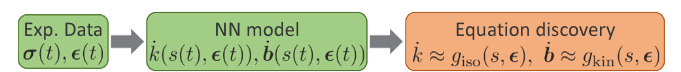

3.2.1. Generation of input data

the equation discovery requires input data consisting of 
- pairs of network outputs:[NNiso, NNk,𝛽 , NNk,𝜈 ]
- network inputs: [𝐼1, ... , 𝐼6].

Given a neural network that accurately describes the evolution laws, we could use a large set of random invariant values as input data to generate a database of the network’s outputs. In practice, however, the network is only trained on invariants faced during training. 

Consequently, we run the full training batch while calculating and saving the invariants, 𝐼1, ... , 𝐼6 in each time step.

We then calculate the network outputs corresponding to invariants in each time step.

Each invariant, as well as each network output, is scaled by its maximum absolute value. The scaled invariants fulfill $\hat{I}_i \in[-1,1]$ for all time steps.

 Due to the activation function in the last layer, the scaled outputs fulfill $\hat{y} . \in[0,1]$ in all time steps (where $\cdot$ represents iso, $\mathrm{k}, v$, or $\mathrm{k}, \beta$ ). 
 
 Finally, duplicate values are removed from the training set.

### 3.2.2. Generation of candidate functions

Each candidate function, $f_i(\underline{\hat{I}})$, should take as input a vector $\underline{\underline{I}}$ of scaled invariants and return a scalar output. The approximation of the scaled total output, $\hat{y}$, is then

$$
\hat{y} \approx \sum_i \hat{p}_i f_i(\underline{\hat{\boldsymbol{I}}})
$$

For this approach to be suitable, considering the scaling of the invariants, we require that $f$ are positively homogeneous functions. This implies that polynomials are allowed, but not, e.g., trigonometric functions or exponential functions. Given these restrictions, we build a basis with the following elementary basis functions:

- Polynomials of $I_j$ up to 2nd order.
- Polynomials of $\left\langle I_j\right\rangle$ up to 2nd order.
- Polynomials of $\left\langle-I_j\right\rangle$ up to 2 nd order.
- Combinations of $\left\langle I_j\right\rangle^n$ with rational and integer exponents, $n \in\{0,1,2,1 / 2,1 / 3\}$ (max 3 factors per term).
- Combinations of $\left\langle-I_j\right\rangle^n$ with rational and integer exponents, $n \in\{0,1,2,1 / 2,1 / 3\}$ (max 3 factors per term).

where the use of the Macaulay bracket, $\langle\bullet\rangle$, enables different parameters for positive and negative values of the same inputs. This gives in total 2680 possible functions after filtering out some known equivalent bases (e.g. we know that $I_3=\beta: \beta \geq 0$ so all terms containing $\left\langle-I_3\right\rangle$ can be removed). Additionally, from each group of functions with matching values for every sample in the dataset, only the one with the lowest number of active invariants is retained.

The limitation of positive homogeneous function can be lifted by not scaling the invariant inputs, which could allow more general candidate functions, such as exponential functions. 

In these cases, it often makes sense to include a parameter inside the functions, i.e. $\exp (p \kappa)$, where $p$ is a parameter. While this is not directly compatible with the standard regression technique, Marino et al. (2023) use a large set of parameterized exponential functions in combination with k-means clustering to find suitable values. Similar to symbolic regression, this approach makes it possible to use more general candidate functions.

## 4.1. Artificial data

data generated by a known plasticity model (Ohno-Wang kinematic hardening law (Ohno and Wang, 1993))

$$
\dot{b}=-\dot{\lambda}\left[v-\frac{3}{2} \frac{\beta}{f_{\mathrm{vM}}(\boldsymbol{\beta})} \frac{\langle v: \boldsymbol{\beta}\rangle}{\beta_{\infty}}\left[\frac{f_{\mathrm{vM}}(\boldsymbol{\beta})}{\beta_{\infty}}\right]^m\right]
$$


In contrast to the Armstrong-Frederick hardening law, the neural network cannot exactly represent this equation.

parameters:
- $H_{\text {kin }}=500 \mathrm{GPa}$,
- $\beta_{\infty}=500 \mathrm{MPa}$,
- $m=2$. 
- $E=210 \mathrm{GPa}$ 
- $v=0.3$, 
- initial yield limit $Y_0=350 \mathrm{MPa}$, 
- Voce-type isotropic hardening with $H_{\text {iso }}=25 \mathrm{GPa}$, 
- $\kappa_{\infty}=100 \mathrm{MPa}$,
- Norton overstress with $t^*=1 \mathrm{~s}$ and $n=2$.


### 4.1.1. Model training
training data is generated by strain-controlled biaxial simulation, corresponding to axial-torsion loading of tubular specimens. 

loading:
- $\epsilon_{11}$
- $\epsilon_{12}$
- $\epsilon_{13}=\epsilon_{23}=0$ 
- $\sigma_{22}=\sigma_{33}=0$

time histories of $\epsilon_{11}$ and $\epsilon_{12}$ are simulated to create three mini-batch sets for training and one set for validation.

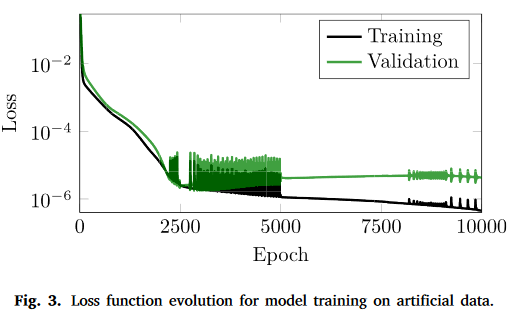

the lowest validation loss occurs during the mini-batch training phase in epoch 2845.

The low relative losses show that the neural network evolution can replicate the material response for the Ohno-Wang evolution law. 

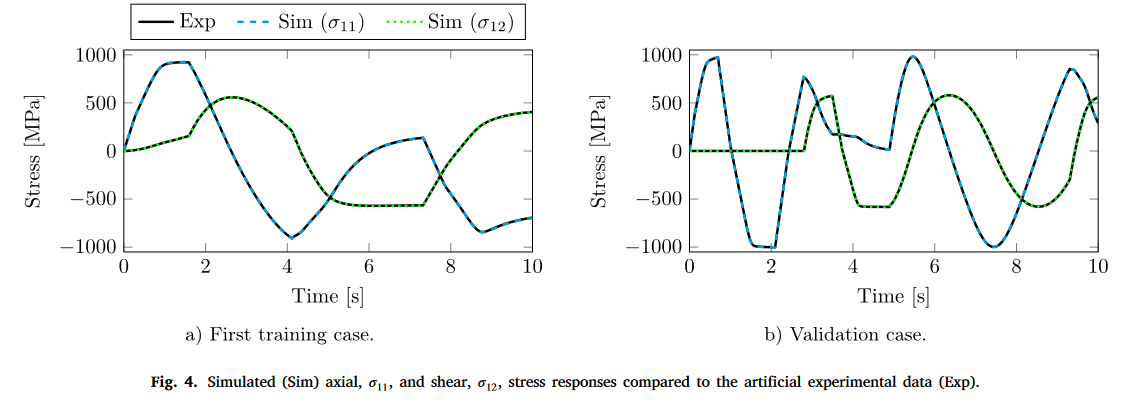

Fig. 4a shows the axial and shear stress responses compared to the first training batch with artificial experimental data. The results are similar for the two other training batches. 

As for the training data, no visual difference can be observed between the neural network model and the artificial experiment data in the validation case in Fig. 4 b.

### 4.1.2. Equation discovery

The previous subsection showed that the neural network could approximate the Ohno-Wang evolution law considering the overall material response.

The next question is whether this evolution law can be re-identified from the trained neural network, assuming the correct equations are part of the candidate functions. 

For the specific material parameters used to generate the artificial data, in particular $m=2$, and considering the structure of the kinematic evolution law in Eq. (11a), we expect to identify

$$
\mathrm{NN}_{\text {iso }}=p_1, \quad \mathrm{NN}_{\mathrm{k}, \beta}=p_2\left\langle I_3\right\rangle \sqrt{I_2}, \quad \boldsymbol{I}_3=\boldsymbol{v}: \boldsymbol{\beta}, \boldsymbol{I}_2=\boldsymbol{\beta}: \boldsymbol{\beta}, \quad \mathrm{NN}_{\mathrm{k}, v}=0
$$

$p_1$ and $p_2$ are constants that depend on the scaling used in the sparse regression.

Since we only expect to find one term per network output, we just run the binomial search for up to two terms.

Table 1 also includes the loss when using zero terms (expected for $\mathrm{NN}_{\mathrm{k}, v}$ ). 

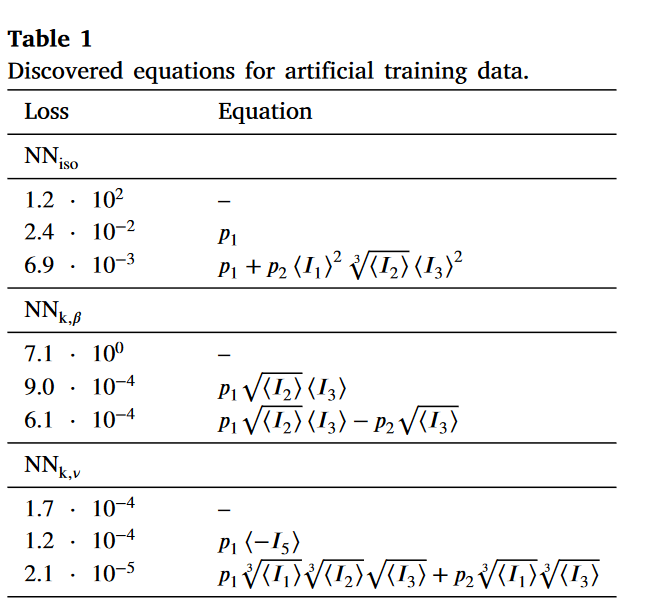

losses are the L2-losses divided by the number of samples and the square of the scaling factor for the network output. 

This scaling enables comparisons with the losses for experimental data in the next section.
These findings show that the expressions in Eq. (36) have been identified.


## 4.2. Experimental data

we apply method to uniaxial experimental data from Meyer and Ahlström (2023).

### 4.2.1. Model training

Similar to above, we choose five different cases: 

For training: monotonic loading as well as the cyclic response 
- $\epsilon_{11}= \pm 0.25 \%$ (first 50 cycles)
- $\epsilon_{11}= \pm 0.8 \%$ (first 3 cycles)
- $\epsilon_{11}= \pm 1.2 \%$ (first 3 cycles)

For validation:
first 25 cycles for $\epsilon_{11}= \pm 0.4 \%$. 
The number of cycles are chosen so that we obtain stabilized hysteresis loops. 

The four different mini-batches consist of 
- (1) the first five (out of 18) steps for the monotonic loading, 
- (2) the first ten cycles for $\epsilon_{11}= \pm 0.25 \%$, 
- (3) the first cycle for $\epsilon_{11}= \pm 0.8 \%$, and 
- (4) the first cycle for $\epsilon_{11}= \pm 1.2 \%$.

Fig. 5 shows the evolution of loss during the training process for the neural network and Chaboche models.

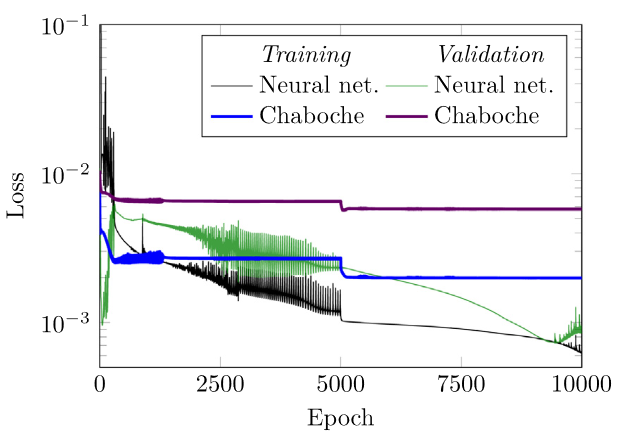

For the Chaboche model, the training and validation losses decrease rapidly before remaining constant during each training phase.

After the mini-batch training phase (first 5000 epochs), an additional slight decrease in the losses occur , resulting in a validation loss of $0.58 \%$.

The training loss for the neural network model shows (on average) a continuous reduction in the loss, initially relatively rapid before slowing down.

The validation loss for the neural network model reduces to an initial minimum within the first 50 epochs before increasing again during the following 250 epochs.

Thereafter, it slowly decreases following the trend of the training loss in the mini-batch updates. 

In the full-batch updates, it reduces further before rising toward the end. This increase indicates overfitting, and the parameters from epoch 9467, which had the lowest validation loss ( $0.073 \%$ ), are used. This loss is almost one order of magnitude lower than that of the Chaboche model discussed above.

The material in Meyer and Ahlström (2023) exhibits a stress plateau followed by hardening.

When analyzing the split between isotropic and kinematic hardening, a rapid decrease in isotropic yield strength combined with a corresponding increase in back-stress (Fig. 10 in Meyer and Ahlström, 2023).

The trained material behavior approximates this behavior as well, seen by the hardening moduli, $H_{\text {iso }} \approx-162 \mathrm{GPa}$ and $H_{\text {kin }} \approx 131 \mathrm{GPa}$ (see Table 2 ), which approximately balance each other, as seen in Fig. 6 . After the initial plateau phase, where the model shows too high stresses, the fit is almost perfect for the remaining loading.

The load case of $\epsilon_{11}= \pm 0.25 \%$, Fig. 7, is hard to fit because the behavior is almost fully elastic in the initial cycle. 

Due to isotropic softening, the plastic strain amplitude increases in subsequent cycles, making the model very sensitive to the initial behavior. After training, this experiment has the highest relative loss of all cases, including the validation case. 

Despite these challenges, the model can obtain a reasonable loop shape in the 50th cycle. In the training case with $\epsilon_{11}= \pm 1.20 \%$, Fig. 8, the overall loop shapes fit very well with experimental results. Even so, there is a slight waviness compared to the experimental curves.

For the validation case, in Fig. 9, there are some discrepancies between the model response and the experiment in the second half-cycle. The model shows a more distinct elastic-to-plastic transition compared to the experiments. However, in the 25 th cycle, the stress-strain curves are very similar, indicating that the model works quite well for the validation case.



### 4.2.2. Equation discovery

The results in the previous section show that the neural network model can simulate the experimental results reasonably well. 

While this model could be used directly, it contains black-box elements for the evolution laws.

Furthermore, it is less efficient than a regular material model due to the embedded networks.

Instead, we identify sparse symbolic approximations of the network outputs. 

For $0-3$ terms, we use a direct binomial search. This method finds the best solution since it tests all possible combinations.

To be able to find expressions with more than three terms, we apply the selection method described in Section 3.2 .3 .

We then run a binomial search on the selected candidate functions to identify up to 6 terms.

As a final comparison, we also perform a direct sparse regression with a varying penalty factor to obtain expressions with different numbers of terms.

The results in Fig. 10 show that 
- (i) the direct binomial search always finds the lowest loss for the given number of terms, and 
- (ii) that losses for sparse regression followed by the binomial search are only moderately higher.

In most cases, the sparse regression followed by a binomial search leads to lower losses than simply increasing the penalty parameter until solutions with few enough terms are found.

The variability in the sparse regression results highlights the issues with local minima discussed in Flaschel et al. (2021).

### 4.2.3. Discovered model

Based on the results in Fig. 10, we evaluate three models closely: 
(i) three terms from direct binomial search, 
(ii) four and (iii) six terms from sparse regression followed by a binomial search. 

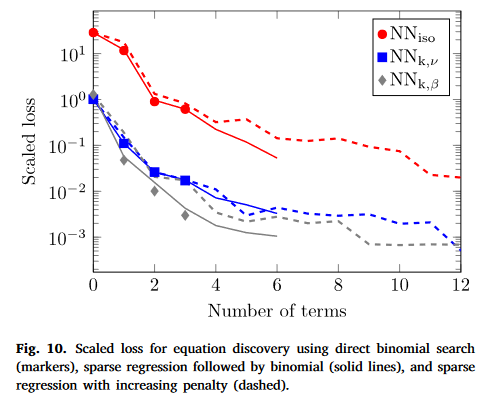


Fig. 11 shows the training evolution for the two first cases compared to the neural network model training. 

Starting with the exact values for the identified parameters would yield a faster convergence, 

but all models start with a random initial guess to ensure a fair comparison.

Using three identified terms for each network output slightly improves the training loss compared to the Chaboche model and greatly reduces the validation loss (from $0.58 \%$ to $0.14 \%$ ). 

With four terms, the discovered model obtains training and validation losses comparable to the neural network model, both obtaining validation losses of $0.083 \%$.

Using the identified model with six terms gives a marginal improvement: The training loss goes from $0.092 \%$ to $0.080 \%$, and the validation loss from $0.083 \%$ to $0.067 \%$. Such marginal improvements do not justify the increased model complexity, and Fig. 11 excludes these results for clarity.

As four terms seem required for an accurate model, the remaining discussion in this section considers this case, for which the evolution equation for isotropic hardening is

$$
\dot{k}=\dot{\lambda}\left[1+\frac{\kappa}{Y_0}+\kappa\left\langle p_{\mathrm{iso}, 1} \kappa+p_{\mathrm{iso}, 2} v: \epsilon_{\mathrm{p}}+p_{\mathrm{iso}, 3}\langle\boldsymbol{v}: \boldsymbol{\beta}\rangle+p_{\mathrm{iso}, 4}\langle-\boldsymbol{v}: \boldsymbol{\beta}\rangle^2\right\rangle\right]
$$

where $p_{\text {iso }, i}$ are new material parameters. The last term within the outer brackets corresponds to $\kappa \mathrm{NN}_{\text {iso }}$ in Eq. (14). Positive network output values, $\mathrm{NN}_{\text {iso }} \geq 0$, used in the sparse regression, do not guarantee that the approximation of $\mathrm{NN}_{\text {iso }}$ is always positive. The expression corresponding to $\mathrm{NN}_{\text {iso }}$ is, therefore, wrapped in a Macaulay bracket. In addition to ensuring thermodynamic consistency, this addition improved the predictive ability of the model of the yield strength evolution in Section 4.2.4.

For kinematic hardening, the $\mathrm{NN}_{\mathrm{k}, v}$ and $\mathrm{NN}_{\mathrm{k}, \beta}$ parts have four terms each, with the complete evolution equation,

$$
\begin{aligned}
\dot{\boldsymbol{b}}=\dot{\lambda}[ & -v+[v: \beta]\left\langle p_{\mathrm{k}, v_1} \kappa+p_{\mathrm{k}, v_2} \kappa\|\boldsymbol{v}\|^2+p_{\mathrm{k}, v_3}\|\boldsymbol{\beta}\|+p_{\mathrm{k}, v_4} \sqrt[3]{\langle-\boldsymbol{v}: \boldsymbol{\beta}\rangle}\right\rangle v \\
& \left.+\left\langle p_{\mathrm{k}, \beta_1}[\boldsymbol{\beta}: v]\|\beta\|^2+p_{\mathrm{k}, \beta_4} \sqrt{\left\langle v: \epsilon_{\mathrm{p}}\right\rangle}\left\|\epsilon_{\mathrm{p}}\right\|^{2 / 3}+p_{\mathrm{k}, \beta_3}\left\langle v: \epsilon_{\mathrm{p}}\right\rangle\left\|\epsilon_{\mathrm{p}}\right\|^2+p_{\mathrm{k}, \beta_2}\langle\boldsymbol{\beta}: v\rangle\right\rangle \beta\right]
\end{aligned}
$$

using the same approach as in Eq. (37) to ensure a positive dissipation.


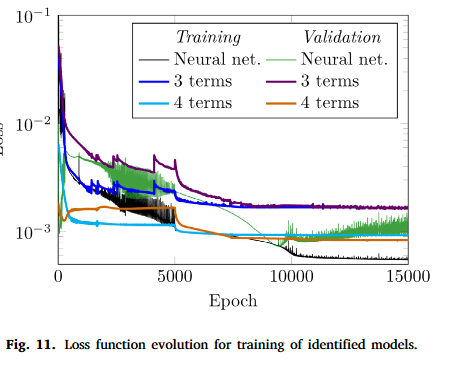



Table 2 shows that all models have similar initial yield stress, $Y_0$, and viscoplastic parameters ( $t^*$ and $n$ ).

While the hardening moduli differ between the models, especially for the Chaboche model, the initial hardening modulus, $H_{\text {iso }}+H_{\text {kin }}$ is within 15 GPa for all models.

As expected from the lower training loss, the identified model fits the monotonic stress-strain curve in Fig. 12 much better than the Chaboche model. However, compared to the neural network model in Fig. 6, the stress increase deviates more from the experiment in the last two cycles. In the case of $\epsilon_{11}= \pm 0.25 \%$ (Figs. 7 and 13), all three models behave practically fully elastic in the first cycle. In the 50th cycle, however, the neural network and identified models give a smoother elastic-to-plastic transition, much closer to the observed experimental behavior than the Chaboche model.

For the case of $\epsilon_{11}= \pm 1.20 \%$ in Fig. 14, the identified is more accurate than the Chaboche model during the elastic-to-plastic transition and toward the end of each cycle. For this case, the neural network model, Fig. 8, exhibited a slight waviness, as previously discussed. This waviness is much more evident for the identified model, the causes for which are discussed in Section 5.3.

In the validation case with $\epsilon_{11}= \pm 0.40 \%$ (Fig. 15), the identified model performs similar to the neural network model, with a more distinct elastic-to-plastic transition than the experiment in the second half-cycle, but with an excellent agreement in the 25th cycle. The Chaboche model cannot capture this smoother loop shape and predicts an almost bi-linear stress-strain curve for both cycles.

### 4.2.4. Yield evolution

Meyer and Ahlström (2023) measured the yield strength explicitly by probing. Due to the smooth elastic-to-plastic transition for the material, it is generally difficult to accurately detect the yield point directly from the stress-strain curve. Consequently, this is also difficult for the material model to learn based solely on stress-strain data. The primary motivation for the study in Meyer and Ahlström (2023) was to investigate the hypothesis that the isotropic hardening only depends on the accumulated plasticity, $\lambda$. Fig. 16 shows that the Chaboche model (circular markers), with Voce hardening, follows the expected gray line, $\sigma_y=Y_0+\kappa_{\infty}\left[1-\exp \left(-H_{\text {iso }} \lambda / \kappa_{\infty}\right)\right]$, for all different load cases. However, the experimental results show that the yield strength evolution depends on the loading case.

The neural network and the identified models have similar evolution behavior in all load cases. For $\epsilon_{11}= \pm 0.25 \%$, the material softens initially before obtaining a constant yield stress. This evolution is qualitatively the same as the experimental results. All models underpredict the plasticity in the first cycles for this loading case, causing the curves to shift to the left compared to the experiments.

For $\epsilon_{11}= \pm 0.4 \%$, the neural network and identified models correctly predict a somewhat lower yield strength than for $0.25 \%$ but do not fully capture the continued softening in the first cycles down to the level of the higher strain amplitudes. For these amplitudes, however, lower yield strengths are correctly identified, as well as the constant level.

For the monotonic loading, the neural network and identified models capture the initial softening followed by hardening. While the models exaggerate this effect compared to the experiments, they could still qualitatively predict the yield strength behaviors from training on the stress-strain curves.

# 5. Discussion
## 5.1. Identification of known evolution laws

As previously discussed, Figs. 3 and 4 show that the neural network model can predict the response for hardening laws that the neural network cannot represent exactly. The results in Table 1 showed that the exact evolution laws could be re-identified by analyzing the trained neural network embedded in the material model. This test shows the potential of the proposed method.

## 5.2. Capabilities of the neural network model

A sufficiently large feed-forward neural network is a universal function approximator that can describe any function (Hornik et al., 1989). From this point of view, one would expect that it should be possible to train the neural network model to fit the experimental data exactly, which the results show that it does not do. There are many possible explanations, some of which are discussed in the following paragraphs.

The network layout described in Section 2.3 is not a universal function approximator. That is not only due to an insufficient size but also because the last activation function prevents negative values. This constraint ensures fulfillment of the 2nd law of thermodynamics and is essential to ensure the physical correctness of the model. We have observed that it improves the model's predictive abilities, even though it increases the training loss slightly, as expected.

Using larger networks did not significantly improve the results, possibly due to the increased complexity of the non-convex optimization problem. However, this result may also indicate deficiencies in the model structure. For example, the standard model assumption of a well-separated elastic and plastic region is only valid for a homogeneous material. Actual test samples consist of a poly-crystalline material in which different grains yield at different stress levels, giving a smooth elastic-to-plastic transition upon load reversal. Modeling frameworks for rate-independent models with smooth elastic-to-plastic transitions were already proposed in the 90 s , by e.g. Lubliner et al. (1993). However, the smooth transition also occurs during reloading, see e.g. Lubliner et al. (1993), Rubin and Forest (2020), which is not the case for the results in Fig. 6. This transition remains a challenge, even with the very general evolution laws represented by the neural network, highlighting the need for alternative modeling frameworks.

## 5.3. Interpretation of the identified behavior

Overall, the identified evolution equation results in a reasonable behavior that is qualitatively similar to the experimental results. The main exception is the waviness observed in Fig. 14 for $\epsilon_{11}= \pm 1.20 \%$. Fig. 17 shows the time evolution of three different invariants, the axial strain, and the axial stress for the two first cycles. All values are normalized by the maximum absolute value to visualize the evolution of quantities of different magnitudes. For comparison, the yield strengths shown in Fig. 16 are given by $Y_0+\kappa$ at the end of each cycle.

In Fig. 17, $I_1=\kappa$ decreases initially. After the load reverses, it increases rapidly before decreasing again. The remaining cycles follow this cyclic pattern of initial hardening followed by softening. The neural network model gives the same behavior. For the identified law, the term $\langle-v: \beta\rangle$ is responsible for the sudden hardening upon load reversal, which makes it possible to model the smooth elastic-to-plastic transition. After the peak of isotropic hardening, a waviness initiates. Many identified terms contain Macaulay brackets, resulting in discontinuous derivatives at zero, contributing to the continued waviness. However, in the remaining experiments and even in other parts of the $\epsilon_{11}= \pm 1.20 \%$ experiment, the behavior is smooth.

While the Macaulay terms introduce some challenges in the model, they differentiate between loading cases. In particular, the difference in isotropic hardening for plastic loading and unloading in Fig. 17 seems to be the main factor in predicting the correct qualitative evolution of the yield strength in Fig. 16. Very few physical processes show abrupt changes in behavior: While it is reasonable to expect a different behavior directly upon load reversal, abrupt changes are unexpected when $v: \epsilon_{\mathrm{p}}$ changes sign during monotonic loading. Smoother changes occur by considering, e.g., quadratic terms as $\left\langle v: \epsilon_{\mathrm{p}}\right\rangle^2$. On the other hand, such terms will grow fast as $\epsilon_{\mathrm{p}}$ increases, leading to worse extrapolation. Nonlinear terms with sigmoidal shapes are attractive here (cf.e.g. the $\tanh$ activation functions used in the neural network). While those functions are unsuitable for sparse regression, they are compatible with symbolic regression. Udrescu and Tegmark (2020) outperformed all available symbolic regression software for the physics problems in "Feynman Lectures on Physics" by first training a neural network on the data and then applying symbolic regression on the trained network. That approach aligns with the work presented herein and provides interesting future extensions.

## 5.4. Implications and opportunities for future studies

While the previous paragraph mentioned possibilities for improved equation discovery, the present section concerns how to improve the neural network model. The presented model starts from a basic plasticity model with isotropic and kinematic hardening. It is well known that plastic loading can result in both an anisotropic yield surface and stiffness degradation. These effects motivate extending the present model by introducing an evolving yield surface and damage evolution. While such extensions are straightforward, sufficient suitable experimental training data is required. A more straight-forward extension would be to consider finite strains following e.g. the framework in Meyer et al. (2018).

The presented work considers only homogenized behavior in both experiments and modeling. Even so, the same idea may be applied to, e.g., crystal plasticity models. However, stress-strain data for individual phases in heterogeneous microstructures are not readily available, and the training would require a finite element model to obtain the material data. One crucial concern for such inverse modeling is the identifiability of material responses for individual phases, grains, and interfaces.

The suitability of training data is also an important consideration when designing the experiments. The predicted yield strength evolution in Fig. 17 was unexpected for the authors. This finding offers essential information for designing experiments to understand yield evolution better. For example, varying the strain amplitude would provide more valuable data as the cyclic responses stabilize after only a few cycles.

## 5.5. Usage in finite element simulations

The proposed framework leads to material models with the same structure as standard material models for finite element simulations and may be used directly in existing finite element codes. However, the highly non-linear local problem does not permit large strain increments during the global equilibrium iterations. While testing the models in the finite element settings, we found that a good initial guess at the beginning of each time step ensured convergence, together with using sufficiently small time steps.

# 6. Contributions

In this paper, we present an approach that embeds a neural network within a conventional material modeling framework. Key advantages of our approach include the intrinsic satisfaction of thermodynamics, frame invariance, and the ability to employ implicit time integration. Moreover, we could discover analytical expressions for the evolution laws by learning from the trained neural network using both artificial and experimental data. The identified laws reveal an interaction between kinematic and isotropic hardening. These new interaction terms enabled the prediction of experimentally observed behaviors of yield strength evolution for various loading cases.

# Appendix. Sensitivity for parameter identification

Because neural networks have many parameters, a gradient-based optimization algorithm is desired.

It requires the sensitivity of the loss, $L_k(p)$, in Eq. (32), with respect to the material parameters $p$. 

As $L_k$ is an explicit function of the simulated time history of stresses, it suffices to calculate the derivative of stress wrt. material parameters.

We start by briefly reviewing the implementation of an elasto-plastic material model to make it easier to explain the various functions required to obtain the sought sensitivity.


## A.1. Material response

A general strain-driven, history-dependent, material model, can be considered as two functions, ${ }^1$

$$
\begin{aligned}
\sigma & =m_\sigma\left(p, \epsilon,{ }^n s, \Delta t\right) \\
s & =m_s\left(p, \epsilon,{ }^n s, \Delta t\right)
\end{aligned}
$$

- $s$ is hidden material state.
- $\Delta t$ is the time increment.
- The notation ${ }^n \bullet$ implies the value of $\bullet$ in the previous time step.
- the state is given by $s=\left[\epsilon_{\mathrm{p}}, \kappa, \beta\right]$.

A standard plasticity model implementation (excluding tangent stiffness calculation for brevity) consists of the following steps.

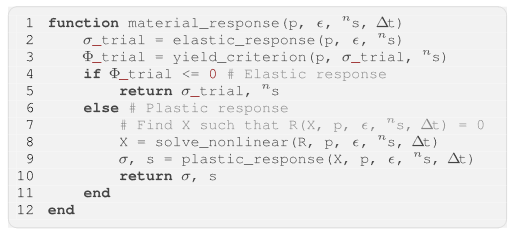

To later calculate the sensitivity of the loss, $\mathrm{d} L_k / \mathrm{d} p$, we will need the 6 sensitivities,

$\frac{\mathrm{d} m_y}{\mathrm{~d} z}$

$\begin{aligned} & y \in\{\sigma, s\} \\ & z \in\left\{\epsilon,{ }^n s, p\right\}\end{aligned}$

The derivatives are trivial and efficient to compute for elastic steps with automatic differentiation.

In the case of a plastic response, however, the implicit function $\boldsymbol{X}\left(\boldsymbol{p}, \boldsymbol{c},{ }^n \boldsymbol{s}, \Delta t\right)$ poses a problem.

Therefore, we extend a standard approach for calculating the material tangent stiffness. Specifically, the residual function will always be zero for any input $p, \epsilon$, or ${ }^n s$, i.e.

$$
\frac{\mathrm{d} \boldsymbol{R}}{\mathrm{d} z}=0=\frac{\partial \boldsymbol{R}}{\partial \boldsymbol{X}} \frac{\mathrm{d} \boldsymbol{X}}{\mathrm{d} z}+\frac{\partial \boldsymbol{R}}{\partial z}
$$

With the function plastic_response on Line 9 denoted as $\hat{m}_y\left(\boldsymbol{X}, \boldsymbol{p}, \boldsymbol{\epsilon},{ }^n \boldsymbol{s}, \Delta t\right)$, the sought derivatives are

$$
\frac{\mathrm{d} m_y}{\mathrm{~d} z}=\frac{\mathrm{d} \hat{m}_y}{\mathrm{~d} \boldsymbol{X}} \frac{\mathrm{d} \boldsymbol{X}}{\mathrm{d} z}+\frac{\partial \hat{m}_y}{\partial z}=-\frac{\mathrm{d} \hat{m}_y}{\mathrm{~d} \boldsymbol{X}}\left[\frac{\partial \boldsymbol{R}}{\partial \boldsymbol{X}}\right]^{-1} \frac{\partial \boldsymbol{R}}{\partial z}+\frac{\partial \hat{m}_y}{\partial z}
$$

for plastic loading ( $\Phi_{\text {trial }}>0$ ). The functions $R$ and $\hat{m}_y$ are explicit (do not contain any iterations), and their derivatives can be efficiently calculated with automatic differentiation.

## A.2. Stress state iterations

In most experiments, not all stress and strain components are measured.

For the uniaxial and biaxial experiments considered in this study, one normal and one shear stress component and the corresponding strain components are available in the results.

The two other normal stresses are zero, while the remaining shear strains are assumed to be zero. 

The corresponding normal strains are unknown, and so are the corresponding shear stresses (although these are typically zero). 

The measured strains are the simulation inputs, and the measured stresses are the outputs.

In addition, we have the constraint that the other assumed values (normal stresses and shear strains) must be zero.

Hence, from the modeling point of view, we have the known stress components,$\tilde{\sigma}$, and the corresponding unknown strain components, $\tilde{\boldsymbol{\epsilon}}$. 

In this paper, these components are $\bullet_{22}$ and $\bullet_{33}$. 

Additionally, we have the unknown stress components, $\hat{\sigma}$, and corresponding known strain components, $\hat{\boldsymbol{e}}$ (components $\bullet_{11}, \bullet_{12}, \bullet_{13}$, and $\bullet_{23}$ in this study). 

As the input to the material function is the full strain tensor, an iterative procedure is required to find the $\tilde{\boldsymbol{e}}$ resulting in the prescribed $\tilde{\sigma}$. 


Three different outputs are the result of such an iterative procedure,

$$
\begin{aligned}
\hat{\boldsymbol{\sigma}} & =g_{\hat{\sigma}}\left(\hat{\boldsymbol{c}},{ }^n \boldsymbol{s}, \boldsymbol{p}, \tilde{\boldsymbol{\sigma}}\right) \\
\boldsymbol{s} & =g_s\left(\hat{\boldsymbol{c}},{ }^n \boldsymbol{s}, \boldsymbol{p}, \tilde{\boldsymbol{\sigma}}\right) \\
\tilde{\boldsymbol{\epsilon}} & =g_{\tilde{\epsilon}}\left(\hat{\boldsymbol{\epsilon}},{ }^n \boldsymbol{s}, \boldsymbol{p}, \tilde{\boldsymbol{\sigma}}\right)
\end{aligned}
$$

where typically $\hat{\sigma}$ are the components considered in the loss, $L_k$ in Eq. (32).
A similar trick as for the material response gives the derivative of the unknown stresses, $\hat{\sigma}$, wrt. the material parameters: We use that the iterative function will always give the same known stresses, $\tilde{\boldsymbol{\sigma}}$, i.e.,

$$
\frac{\mathrm{d} \tilde{\sigma}}{\mathrm{d} p}=\mathbf{0}=\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d} \boldsymbol{p}}+\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d} \tilde{e}} \frac{\mathrm{d} g_{\bar{e}}}{\mathrm{~d} \boldsymbol{p}}+\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d}\left[{ }^n s\right]} \frac{\mathrm{d}\left[{ }^n g_s\right]}{\mathrm{d} p}
$$

allowing the derivative of the unknown strains to be calculated as

$$
\frac{\mathrm{d} g_{\bar{\epsilon}}}{\mathrm{d} \boldsymbol{p}}=-\left[\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d} \tilde{\epsilon}}\right]^{-1}\left[\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d} p}+\frac{\mathrm{d} m_{\bar{\sigma}}}{\mathrm{d}\left[{ }^n s\right]} \frac{\mathrm{d}\left[{ }^n g_s\right]}{\mathrm{d} p}\right]
$$


Given that derivative, the sensitivity of the unknown stresses, $\hat{\sigma}$, can be calculated as

$$
\frac{\mathrm{d} g_{\hat{o}}}{\mathrm{~d} \boldsymbol{p}}=\frac{\mathrm{d} m_{\hat{\sigma}}}{\mathrm{d} \boldsymbol{p}}+\frac{\mathrm{d} m_{\hat{\sigma}}}{\mathrm{d} \tilde{\boldsymbol{\epsilon}}} \frac{\mathrm{d} g_{\tilde{\epsilon}}}{\mathrm{d} \boldsymbol{p}}+\frac{\mathrm{d} m_{\hat{\sigma}}}{\mathrm{d}\left[{ }^n \boldsymbol{s}\right]} \frac{\mathrm{d}\left[{ }^n g_s\right]}{\mathrm{d} \boldsymbol{p}}
$$


However, from the last term in Eqs. (45) and (46), the value of $\mathrm{d}\left[{ }^n g_s\right] / \mathrm{d} p$, which stems from the previous time step, has yet to be discussed: In the first time step, this derivative is zero because the initial state is independent of the material parameters. Assuming that the value in the previous time step is known, the value in the current time step can be calculated as

$$
\frac{\mathrm{d} g_s}{\mathrm{~d} p}=\frac{\mathrm{d} m_s}{\mathrm{~d} p}+\frac{\mathrm{d} m_s}{\mathrm{~d} \tilde{\epsilon}} \frac{\mathrm{d} g_{\bar{\epsilon}}}{\mathrm{d} \boldsymbol{p}}+\frac{\mathrm{d} m_s}{\mathrm{~d}\left[{ }^n s\right]} \frac{\mathrm{d}\left[{ }^n g_s\right]}{\mathrm{d} \boldsymbol{p}}
$$


This result can then be used in the following time step to calculate $\mathrm{d} g_{\hat{\sigma}} / \mathrm{d} p$, and finally $\mathrm{d} L_k / \mathrm{d} p$.
For performance reasons, it is important to note that for each local iteration in the material model, i.e. solving $\boldsymbol{R}\left(\boldsymbol{X}, \boldsymbol{p}, \boldsymbol{c},{ }^n \boldsymbol{s}, \Delta t\right)=$ 0 , only the derivative $\partial R / \partial X$ needs to be calculated. This derivative is also required without sensitivity calculations. Furthermore, the algorithmic tangent stiffness, $\mathrm{d} m_\sigma / \mathrm{d} \epsilon$, must be calculated once per stress state iteration. This calculation is also always needed. The additional computations for calculating the material sensitivities occur only at the end of each time step after the local material model iterations and the stress state iterations converge. This possibility reduces the computational costs of obtaining the sensitivity.